In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/energy consumption prediction.csv')
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


#Display basic information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


Here non-null counts and we have data types(numeric, categorical, etc.).

In [6]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [8]:
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


#EDA - Visualizing Energy Consumption Trends

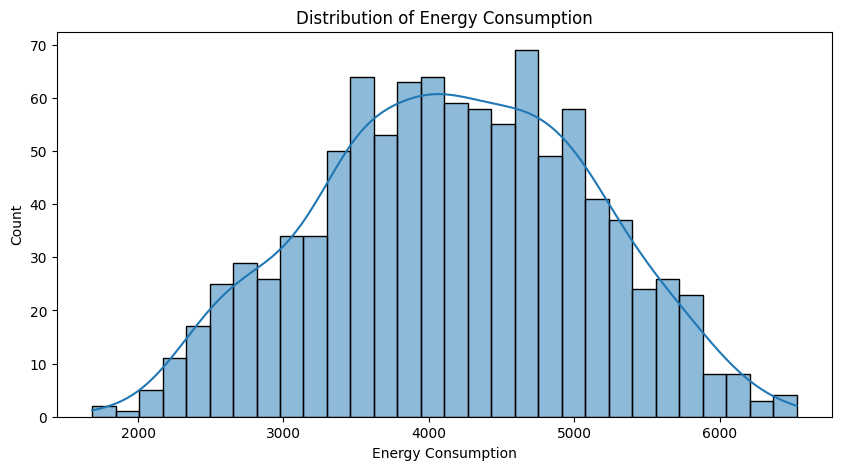

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Energy Consumption'], bins=30, kde=True)
plt.title("Distribution of Energy Consumption")
plt.show()

From the above graph, it is a Normal distribution(bell-shaped).

#Boxplot for outlier detection

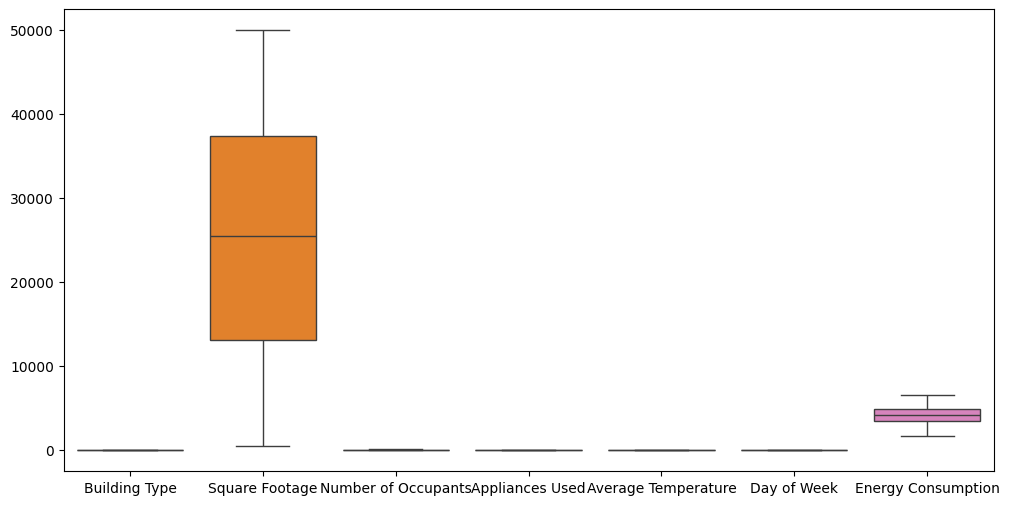

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.show()

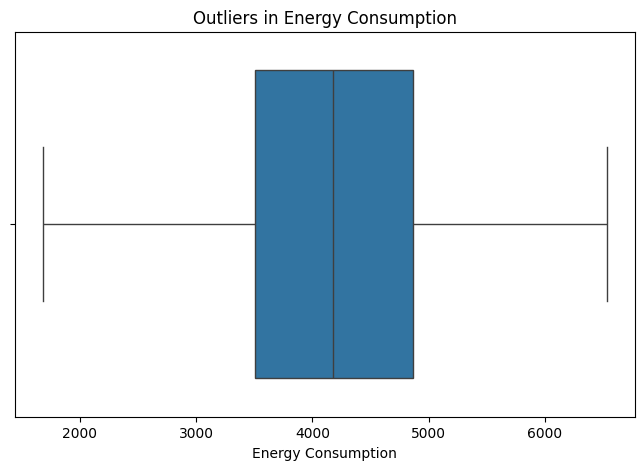

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Energy Consumption'])
plt.title("Outliers in Energy Consumption")
plt.show()

Used boxplot to identify the outliers.

#Data Visualization

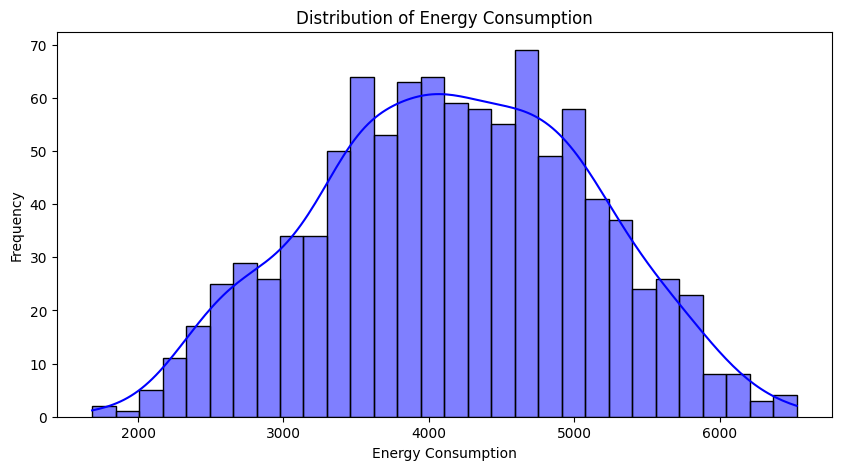

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(df['Energy Consumption'], bins=30, kde=True, color='blue')
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

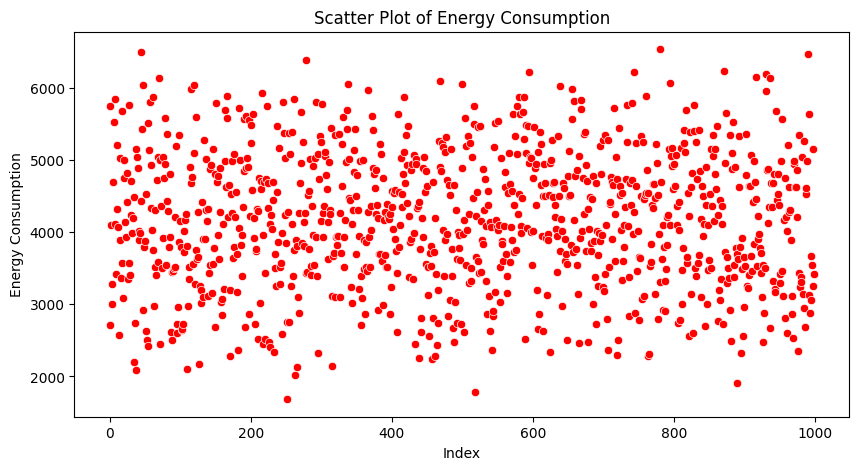

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.index, y=df['Energy Consumption'], color='red')
plt.title('Scatter Plot of Energy Consumption')
plt.xlabel('Index')
plt.ylabel('Energy Consumption')
plt.show()

<ipython-input-50-3524352c7e41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Energy Consumption'], bins=30, kde=True, color='green')


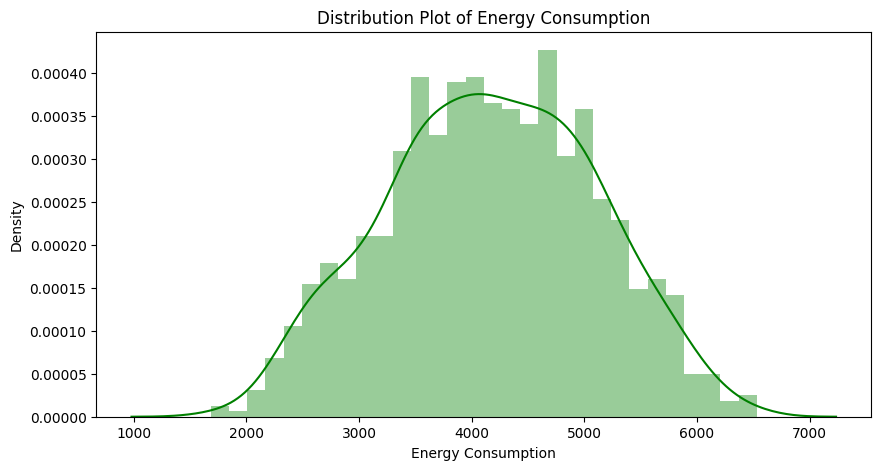

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(df['Energy Consumption'], bins=30, kde=True, color='green')
plt.title('Distribution Plot of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Density')
plt.show()


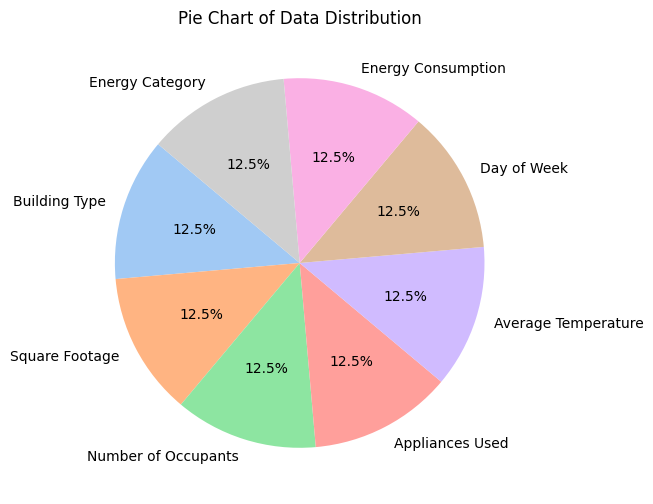

In [54]:
plt.figure(figsize=(6,6))
labels = df.columns
data_counts = df.count()
plt.pie(data_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Data Distribution')
plt.show()

#Heatmap of Correlation Matrix

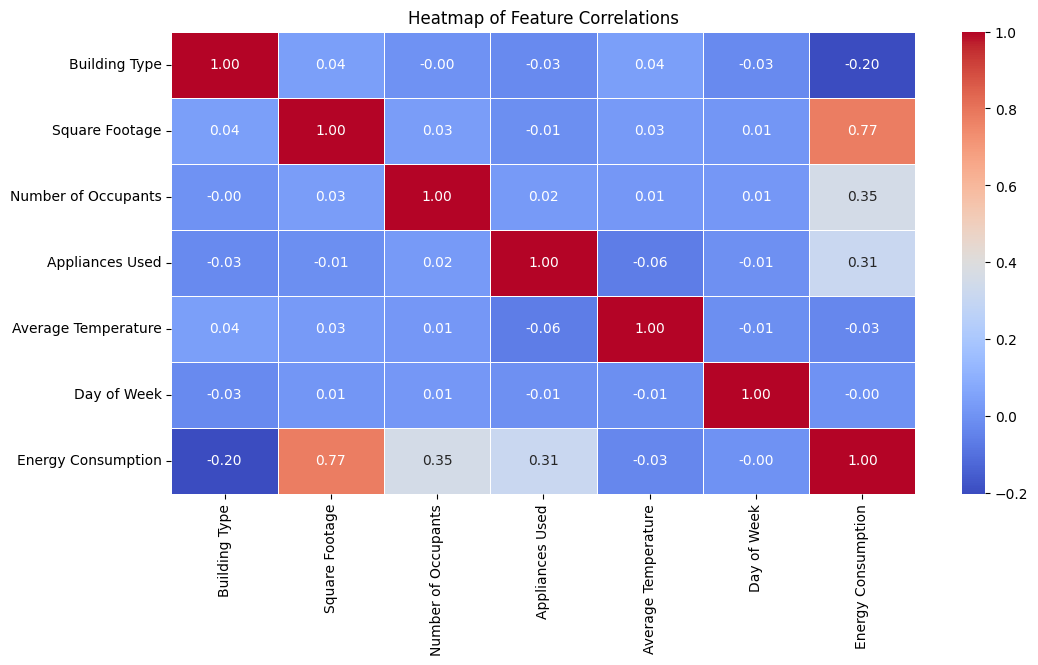

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

Dark Red (Close to 1) → Strong positive correlation.

Dark Blue (Close to -1) → Strong negative correlation.

White (Close to 0) → No correlation.

#Encoding categorical variables

In [12]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['Building Type'] = label_enc.fit_transform(df['Building Type'])
df['Day of Week'] = label_enc.fit_transform(df['Day of Week'])

In [13]:
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99
2,1,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,0,13375,26,18,11.92,0,3279.17
...,...,...,...,...,...,...,...
995,2,14419,68,44,23.95,1,3661.21
996,1,12194,7,22,14.67,1,3546.34
997,0,39562,88,20,32.18,0,5147.21
998,2,8348,67,37,16.48,1,3244.98


Transforms categorical labels of 'Building Type' and 'Day of Week' into numbers.

'Building Type' = ['Residential', 'Commercial', 'Industrial'] → [0, 1, 2]

'Day of Week' = ['weekday','weekend'] → [0, 1]

#Feature Selection

In [14]:
X = df.drop(columns=['Energy Consumption'])
y = df['Energy Consumption']

Normalizes numerical data so models perform better.

Mean = 0 and Standard Deviation = 1


#Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Splits data into training (80%) and testing (20%) sets.

#Regression Model - Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)

Regression Evaluation

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2 = r2_score(y_test, y_pred_reg)
print(f"Regression Model Performance:\nRMSE: {rmse}\nR² Score: {r2}")

Regression Model Performance:
RMSE: 134.86195923094493
R² Score: 0.9776645692946015


Lower RMSE and higher R² indicate a better model.

Classification (Categorizing energy consumption as Low, Medium, High)

In [21]:
df['Energy Category'] = pd.qcut(df['Energy Consumption'], q=3, labels=['Low', 'Medium', 'High'])
y_class = df['Energy Category']
y_class = label_enc.fit_transform(y_class)

Converts numerical predictions into categories.
Creates discrete labels (Low, Medium, High)

#Train-Test Split for Classification

In [22]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

Classification Model - Random Forest


In [23]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)

Classification Evaluation

In [24]:
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Classification Model Accuracy: {accuracy}")

Classification Model Accuracy: 0.89


#Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_cls, y_train_cls)
y_pred_logistic = logistic_model.predict(X_test_cls)

Logistic Regression Evaluation

In [30]:
logistic_accuracy = accuracy_score(y_test_cls, y_pred_logistic)
print(f"Logistic Regression Model Accuracy: {logistic_accuracy}")

Logistic Regression Model Accuracy: 0.75


#Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_cls, y_train_cls)
y_pred_tree = decision_tree.predict(X_test_cls)

Decision Tree Evaluation

In [34]:
decision_tree_accuracy = accuracy_score(y_test_cls, y_pred_tree)
print(f"Decision Tree Model Accuracy: {decision_tree_accuracy}")

Decision Tree Model Accuracy: 0.85


#Support Vector Machine (SVM) Classifier

In [36]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_cls, y_train_cls)
y_pred_svm = svm_model.predict(X_test_cls)

SVM Evaluation

In [37]:
svm_accuracy = accuracy_score(y_test_cls, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy}")

SVM Model Accuracy: 0.76


#Confusion Matrix & Classification Report


Confusion Matrix for Random Forest:


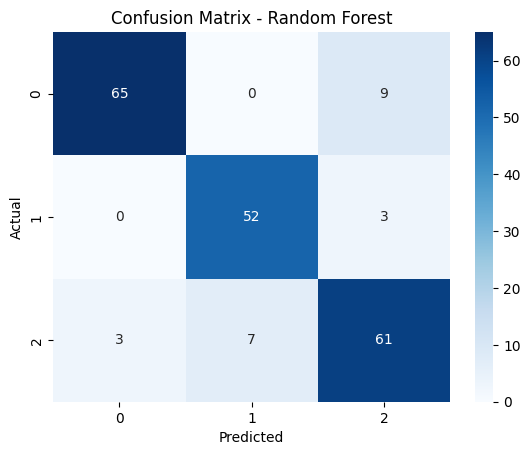

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        74
           1       0.88      0.95      0.91        55
           2       0.84      0.86      0.85        71

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200


Confusion Matrix for Logistic Regression:


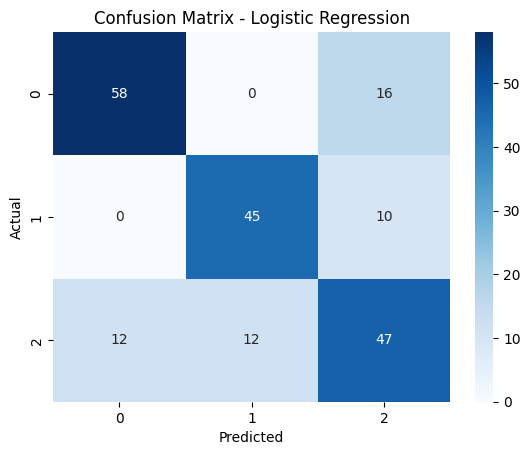

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        74
           1       0.79      0.82      0.80        55
           2       0.64      0.66      0.65        71

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200


Confusion Matrix for Decision Tree:


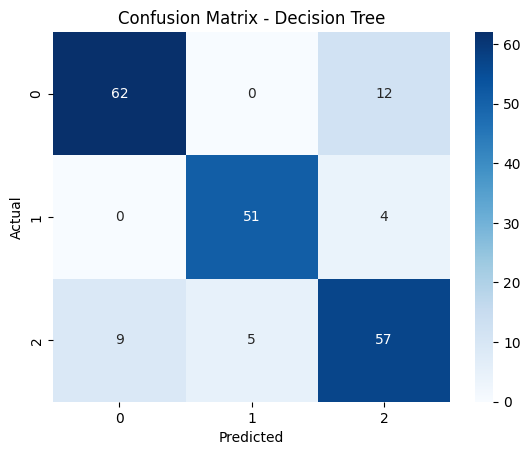

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        74
           1       0.91      0.93      0.92        55
           2       0.78      0.80      0.79        71

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.86       200
weighted avg       0.85      0.85      0.85       200


Confusion Matrix for SVM:


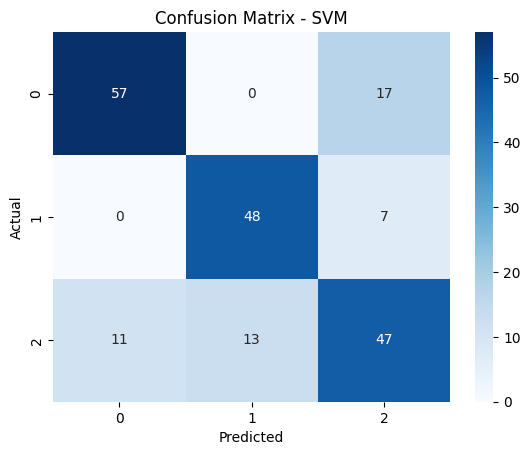

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80        74
           1       0.79      0.87      0.83        55
           2       0.66      0.66      0.66        71

    accuracy                           0.76       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.76      0.76      0.76       200



In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
models = {"Random Forest": y_pred_cls, "Logistic Regression": y_pred_logistic, "Decision Tree": y_pred_tree, "SVM": y_pred_svm}
for model_name, predictions in models.items():
    print(f"\nConfusion Matrix for {model_name}:")
    cm = confusion_matrix(y_test_cls, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print(f"Classification Report for {model_name}:\n", classification_report(y_test_cls, predictions))

Precision → How many predicted positives are actually correct?

Recall → How many actual positives were correctly predicted?

F1-Score → Harmonic mean of Precision & Recall.

Support → The number of actual samples in each class.

#ROC-AUC Score and Curve

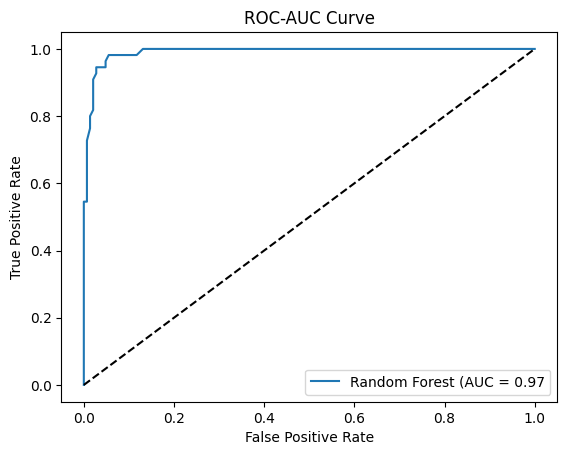

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
if hasattr(model, "predict_proba"):
  y_probs = model.predict_proba(X_test_cls)
  auc = roc_auc_score(y_test_cls, y_probs, multi_class='ovr')
  fpr, tpr, _ = roc_curve(y_test_cls, y_probs[:, 1], pos_label=1)
  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


It measures how many actual positives were correctly predicted.

A higher TPR is better.

ROC curve of Random Forest indicates a better model.

#Insights

In [39]:
print("\nKey Insights:")
print("1. Regression model achieved an R² score of", round(r2, 2), "indicating how well features predict energy consumption.")
print("2. Classification model achieved", round(accuracy * 100, 2), "% accuracy in categorizing energy usage.")
print("3. Logistic Regression achieved", round(logistic_accuracy * 100, 2), "% accuracy, showing its performance in classification tasks.")
print("4. Decision Tree achieved", round(decision_tree_accuracy * 100, 2), "% accuracy, providing an alternative classification model.")
print("5. SVM achieved", round(svm_accuracy * 100, 2), "% accuracy, demonstrating its ability in classification tasks.")
print("6. Feature importance analysis suggests that Square Footage and Appliances Used have a major impact on consumption.")


Key Insights:
1. Regression model achieved an R² score of 0.98 indicating how well features predict energy consumption.
2. Classification model achieved 89.0 % accuracy in categorizing energy usage.
3. Logistic Regression achieved 75.0 % accuracy, showing its performance in classification tasks.
4. Decision Tree achieved 85.0 % accuracy, providing an alternative classification model.
5. SVM achieved 76.0 % accuracy, demonstrating its ability in classification tasks.
6. Feature importance analysis suggests that Square Footage and Appliances Used have a major impact on consumption.
